In [11]:
import pandas as pd
from summer.utils import ref_times_to_dti
from autumn.tools.project import get_project, load_timeseries, build_rel_path

In [13]:
from autumn.projects.sm_sir.bangladesh.bangladesh import project

In [15]:
def convert_ts_index_to_date(ts):
    ts.index = ref_times_to_dti(project.BASE_DATE, ts.index)
    return ts
def convert_ts_set_to_date(ts_set):
    return {k: convert_ts_index_to_date(v) for k, v in ts_set.items()}

In [12]:
p = get_project("sm_sir", "bangladesh", reload=True)

In [16]:
timeseries_path = str(p.get_path() / "timeseries.json")
ts_set = load_timeseries(timeseries_path)
ts_set_dates = convert_ts_set_to_date(ts_set)
notif_smooth = pd.Series(ts_set_dates["notifications"].rolling(window=7, center=True).mean())

In [17]:
results = p.run_baseline_model(project.param_set.baseline)

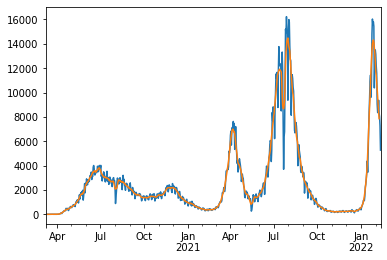

In [20]:
ts_set_dates["notifications"].plot()
notif_smooth.plot()
derived_outputs = results.get_derived_outputs_df()
# derived_outputs["notifications"].plot()